In [ ]:
# Install Kaggle API package
# !pip install kaggle


In [ ]:

# Download the dataset
# !kaggle datasets download -d matthewjansen/ucf101-action-recognition

In [ ]:
# import zipfile
# import os

# # Path to the zip file
# zip_file_path = './ucf101-action-recognition.zip'
# extracted_path = './ucf101-action-recognition'

# # Unzipping the file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extracted_path)

# # Check if extraction was successful
# extracted_files = os.listdir(extracted_path)
# print("Files and directories after extraction:")
# for file in extracted_files:
#     print(file)


In [3]:
# Path to the train and val directories

import os 

print("Files and directories after extraction:", os.listdir('./ucf101-action-recognition'))
extracted_path = './ucf101-action-recognition'


train_dir = os.path.join(extracted_path, 'train')
val_dir = os.path.join(extracted_path, 'val')

# List directories (classes) inside the train and val directories
def list_class_dirs(directory):
    return [class_dir for class_dir in os.listdir(directory) if os.path.isdir(os.path.join(directory, class_dir))]

# List available classes in the train and val directories
train_class_dirs = list_class_dirs(train_dir)
val_class_dirs = list_class_dirs(val_dir)

print("Classes in train directory:")
for class_dir in train_class_dirs:
    print(class_dir)

print("\nClasses in val directory:")
for class_dir in val_class_dirs:
    print(class_dir)


Files and directories after extraction: ['test', 'test.csv', 'train', 'train.csv', 'val', 'val.csv']
Classes in train directory:
ApplyEyeMakeup
ApplyLipstick
Archery
BabyCrawling
BalanceBeam
BandMarching
BaseballPitch
Basketball
BasketballDunk
BenchPress
Biking
Billiards
BlowDryHair
BlowingCandles
BodyWeightSquats
Bowling
BoxingPunchingBag
BoxingSpeedBag
BreastStroke
BrushingTeeth
CleanAndJerk
CliffDiving
CricketBowling
CricketShot
CuttingInKitchen
Diving
Drumming
Fencing
FieldHockeyPenalty
FloorGymnastics
FrisbeeCatch
FrontCrawl
GolfSwing
Haircut
Hammering
HammerThrow
HandstandPushups
HandstandWalking
HeadMassage
HighJump
HorseRace
HorseRiding
HulaHoop
IceDancing
JavelinThrow
JugglingBalls
JumpingJack
JumpRope
Kayaking
Knitting
LongJump
Lunges
MilitaryParade
Mixing
MoppingFloor
Nunchucks
ParallelBars
PizzaTossing
PlayingCello
PlayingDaf
PlayingDhol
PlayingFlute
PlayingGuitar
PlayingPiano
PlayingSitar
PlayingTabla
PlayingViolin
PoleVault
PommelHorse
PullUps
Punch
PushUps
Rafting
RockCl

In [4]:
import pandas as pd
import os
extracted_path = './ucf101-action-recognition'

# Path to the CSV files
train_csv_path = os.path.join(extracted_path, 'train.csv')
val_csv_path = os.path.join(extracted_path, 'val.csv')

# Load the CSV files
train_df = pd.read_csv(train_csv_path)
val_df = pd.read_csv(val_csv_path)

# Display the first few rows of train.csv to understand its structure
print("Training Data Sample:")
print(train_df.head())

# Filter for the selected classes
selected_classes = ['Biking', 'SoccerPenalty', 'JumpingJack', 'BasketballDunk', 'VolleyballSpiking']

train_selected = train_df[train_df['label'].isin(selected_classes)]
val_selected = val_df[val_df['label'].isin(selected_classes)]

# Display filtered train and val datasets
print("\nFiltered Training Data:")
print(train_selected.head())

print("\nFiltered Validation Data:")
print(val_selected.head())


Training Data Sample:
         clip_name                         clip_path  label
0  v_Swing_g05_c02  /train/Swing/v_Swing_g05_c02.avi  Swing
1  v_Swing_g21_c03  /train/Swing/v_Swing_g21_c03.avi  Swing
2  v_Swing_g07_c01  /train/Swing/v_Swing_g07_c01.avi  Swing
3  v_Swing_g24_c04  /train/Swing/v_Swing_g24_c04.avi  Swing
4  v_Swing_g20_c03  /train/Swing/v_Swing_g20_c03.avi  Swing

Filtered Training Data:
                  clip_name                                     clip_path  \
1282  v_JumpingJack_g13_c03  /train/JumpingJack/v_JumpingJack_g13_c03.avi   
1283  v_JumpingJack_g14_c03  /train/JumpingJack/v_JumpingJack_g14_c03.avi   
1284  v_JumpingJack_g25_c02  /train/JumpingJack/v_JumpingJack_g25_c02.avi   
1285  v_JumpingJack_g01_c04  /train/JumpingJack/v_JumpingJack_g01_c04.avi   
1286  v_JumpingJack_g06_c06  /train/JumpingJack/v_JumpingJack_g06_c06.avi   

            label  
1282  JumpingJack  
1283  JumpingJack  
1284  JumpingJack  
1285  JumpingJack  
1286  JumpingJack  

Filtered 

In [5]:
# Function to list video clips for each selected class
def list_videos_for_class(df, class_name, video_dir):
    class_df = df[df['label'] == class_name]
    videos = class_df['clip_path'].values  # Get paths for videos
    return [os.path.join(video_dir, video) for video in videos]

# List the video files for selected classes
train_videos = {class_name: list_videos_for_class(train_selected, class_name, os.path.join(train_dir, class_name)) for class_name in selected_classes}
val_videos = {class_name: list_videos_for_class(val_selected, class_name, os.path.join(val_dir, class_name)) for class_name in selected_classes}

print("\nTrain Videos for Selected Classes:")
for class_name, videos in train_videos.items():
    print(f"\nClass: {class_name}")
    print(videos[:5])  # Displaying first 5 video paths for each class

print("\nValidation Videos for Selected Classes:")
for class_name, videos in val_videos.items():
    print(f"\nClass: {class_name}")
    print(videos[:5])  # Displaying first 5 video paths for each class



Train Videos for Selected Classes:

Class: Biking
['/train/Biking/v_Biking_g21_c05.avi', '/train/Biking/v_Biking_g15_c01.avi', '/train/Biking/v_Biking_g16_c02.avi', '/train/Biking/v_Biking_g17_c04.avi', '/train/Biking/v_Biking_g07_c05.avi']

Class: SoccerPenalty
['/train/SoccerPenalty/v_SoccerPenalty_g22_c05.avi', '/train/SoccerPenalty/v_SoccerPenalty_g12_c03.avi', '/train/SoccerPenalty/v_SoccerPenalty_g22_c02.avi', '/train/SoccerPenalty/v_SoccerPenalty_g20_c03.avi', '/train/SoccerPenalty/v_SoccerPenalty_g01_c06.avi']

Class: JumpingJack
['/train/JumpingJack/v_JumpingJack_g13_c03.avi', '/train/JumpingJack/v_JumpingJack_g14_c03.avi', '/train/JumpingJack/v_JumpingJack_g25_c02.avi', '/train/JumpingJack/v_JumpingJack_g01_c04.avi', '/train/JumpingJack/v_JumpingJack_g06_c06.avi']

Class: BasketballDunk
['/train/BasketballDunk/v_BasketballDunk_g05_c04.avi', '/train/BasketballDunk/v_BasketballDunk_g03_c04.avi', '/train/BasketballDunk/v_BasketballDunk_g02_c04.avi', '/train/BasketballDunk/v_Bas

Data  augmentation

In [ ]:
!rm -r ./frames


Testing

only frames no augmentation 


In [ ]:
import cv2
import os
import numpy as np
from tqdm import tqdm

# Path for saving frames
frame_save_path = './frames_raw/'

# Ensure the directory for saving frames exists
os.makedirs(frame_save_path, exist_ok=True)

# Function to extract frames from a video
def extract_frames(video_path, class_name, clip_name, save_path, frame_size=(64, 64)):
    # Create a directory for the class if it doesn't exist
    class_save_path = os.path.join(save_path, class_name)
    os.makedirs(class_save_path, exist_ok=True)

    # Create a directory for the specific video clip
    clip_save_path = os.path.join(class_save_path, clip_name)
    os.makedirs(clip_save_path, exist_ok=True)

    # Open video file
    cap = cv2.VideoCapture(video_path)

    # Read frames and save them
    frame_num = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Resize the frame
        frame_resized = cv2.resize(frame, frame_size)

        # Convert to grayscale (optional)
        frame_gray = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)

        # Save frame as an image
        frame_filename = f"{clip_name}_frame_{frame_num:03d}.jpg"
        cv2.imwrite(os.path.join(clip_save_path, frame_filename), frame_gray)

        frame_num += 1

    cap.release()

# Example: Extract frames from videos for the 'JumpingJack' class
# for class_name in ['Biking', 'SoccerPenalty', 'JumpingJack', 'BasketballDunk', 'VolleyballSpiking']:
#     for video in train_df[train_df['label'] == class_name]['clip_path']:
#         video_filename = video#.split('/')[-1]#.replace('.avi', '')
#         print(f"Extracting frames for {class_name} - {video_filename}")
#         extract_frames('./ucf101-action-recognition'+video, class_name, video_filename, frame_save_path)
for class_name in ['Biking', 'SoccerPenalty', 'JumpingJack', 'BasketballDunk', 'VolleyballSpiking']:
    for video in train_df[train_df['label'] == class_name]['clip_path']:
        video_filename = video.split('/')[-1].replace('.avi', '')
        # print(f"Extracting and augmenting frames for {class_name} - {video_filename}")
        extract_frames('./ucf101-action-recognition' + video, class_name, video_filename, frame_save_path)

Works

with data augmentation

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to extract and augment frames from the video
def extract_frames(video_path, class_name, clip_name, save_path, frame_size=(64, 64), num_augmented_frames=5):
    # Open the video file using OpenCV
    cap = cv2.VideoCapture(video_path)

    # Check if video opened successfully
    if not cap.isOpened():
        print(f"Error: Could not open video {video_path}")
        return

    frame_count = 0
    while True:
        ret, frame = cap.read()

        # If the frame is read correctly, process it
        if not ret:
            break

        # Resize frame to the desired size
        frame_resized = cv2.resize(frame, frame_size)

        # Construct file path for saving original frame
        frame_dir = os.path.join(save_path, class_name, clip_name)
        os.makedirs(frame_dir, exist_ok=True)
        frame_path = os.path.join(frame_dir, f'{clip_name}_frame_{frame_count}.jpg')

        # Save the raw frame
        cv2.imwrite(frame_path, frame_resized)
        # print(f"Saved original frame: {frame_path}")

        # Augmentation setup
        frame_expanded = np.expand_dims(frame_resized, axis=0)
        datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )

        # Create an iterator for augmented frames
        frame_iterator = datagen.flow(frame_expanded, batch_size=1)

        # Save the augmented frames
        for i in range(num_augmented_frames):
            augmented_frame = next(frame_iterator)[0].astype(np.uint8)
            augmented_frame_path = os.path.join(frame_dir, f'{clip_name}_frame_{frame_count}_aug_{i}.jpg')
            cv2.imwrite(augmented_frame_path, augmented_frame)
            # print(f"Saved augmented frame: {augmented_frame_path}")

        frame_count += 1

    # Release the video capture object
    cap.release()
    # print(f"Frame extraction and augmentation completed for {clip_name}")

# Example usage:
frame_save_path = './frames/'  # Make sure this is the correct path

# Iterate over multiple classes and videos
for class_name in ['Biking', 'SoccerPenalty', 'JumpingJack', 'BasketballDunk', 'VolleyballSpiking']:
    for video in train_df[train_df['label'] == class_name]['clip_path']:
        video_filename = video.split('/')[-1].replace('.avi', '')
        # print(f"Extracting and augmenting frames for {class_name} - {video_filename}")
        extract_frames('./ucf101-action-recognition' + video, class_name, video_filename, frame_save_path)


validation video frame extraction 

In [ ]:
import cv2
import os
import numpy as np
from tqdm import tqdm

# Path for saving frames
frame_save_path = './frames_val/'


for class_name in ['Biking', 'SoccerPenalty', 'JumpingJack', 'BasketballDunk', 'VolleyballSpiking']:
    for video in val_df[val_df['label'] == class_name]['clip_path']:
        video_filename = video.split('/')[-1].replace('.avi', '')
        # print(f"Extracting and augmenting frames for {class_name} - {video_filename}")
        extract_frames('./ucf101-action-recognition' + video, class_name, video_filename, frame_save_path)

In [2]:
import os
os.listdir('./frames/Biking/v_Biking_g21_c05')

['v_Biking_g21_c05_frame_0.jpg',
 'v_Biking_g21_c05_frame_0_aug_0.jpg',
 'v_Biking_g21_c05_frame_0_aug_1.jpg',
 'v_Biking_g21_c05_frame_0_aug_2.jpg',
 'v_Biking_g21_c05_frame_0_aug_3.jpg',
 'v_Biking_g21_c05_frame_0_aug_4.jpg',
 'v_Biking_g21_c05_frame_1.jpg',
 'v_Biking_g21_c05_frame_10.jpg',
 'v_Biking_g21_c05_frame_100.jpg',
 'v_Biking_g21_c05_frame_100_aug_0.jpg',
 'v_Biking_g21_c05_frame_100_aug_1.jpg',
 'v_Biking_g21_c05_frame_100_aug_2.jpg',
 'v_Biking_g21_c05_frame_100_aug_3.jpg',
 'v_Biking_g21_c05_frame_100_aug_4.jpg',
 'v_Biking_g21_c05_frame_101.jpg',
 'v_Biking_g21_c05_frame_101_aug_0.jpg',
 'v_Biking_g21_c05_frame_101_aug_1.jpg',
 'v_Biking_g21_c05_frame_101_aug_2.jpg',
 'v_Biking_g21_c05_frame_101_aug_3.jpg',
 'v_Biking_g21_c05_frame_101_aug_4.jpg',
 'v_Biking_g21_c05_frame_102.jpg',
 'v_Biking_g21_c05_frame_102_aug_0.jpg',
 'v_Biking_g21_c05_frame_102_aug_1.jpg',
 'v_Biking_g21_c05_frame_102_aug_2.jpg',
 'v_Biking_g21_c05_frame_102_aug_3.jpg',
 'v_Biking_g21_c05_frame_1

takes 10 frames frdicts 10

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_conv_lstm(input_shape=(10, 64, 64, 1)):  # 10 frames of size 64x64 with 1 channel (grayscale)
    model = models.Sequential()

    # ConvLSTM layer with padding='same' to maintain the same spatial dimensions
    model.add(layers.ConvLSTM2D(filters=64, kernel_size=(3, 3), activation='relu', 
                                input_shape=input_shape, return_sequences=True, padding='same'))
    model.add(layers.BatchNormalization())

    # Second ConvLSTM layer with padding='same'
    model.add(layers.ConvLSTM2D(filters=64, kernel_size=(3, 3), activation='relu', return_sequences=True, padding='same'))
    model.add(layers.BatchNormalization())

    # Conv3D layer to produce the next frame, with padding='same' to maintain dimensions
    model.add(layers.Conv3D(filters=1, kernel_size=(3, 3, 3), activation='sigmoid', padding='same'))  # filters=1 for grayscale

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    return model

# Instantiate and view model summary
input_shape = (10, 64, 64, 1)  # 10 frames of size 64x64 with 1 channel (grayscale)
conv_lstm_model = build_conv_lstm(input_shape)
conv_lstm_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 10, 64, 64, 64)    150016    
                                                                 
 batch_normalization (BatchN  (None, 10, 64, 64, 64)   256       
 ormalization)                                                   
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 10, 64, 64, 64)    295168    
                                                                 
 batch_normalization_1 (Batc  (None, 10, 64, 64, 64)   256       
 hNormalization)                                                 
                                                                 
 conv3d (Conv3D)             (None, 10, 64, 64, 1)     1729      
                                                                 
Total params: 447,425
Trainable params: 447,169
Non-trai

takes 10 frames predicts 5 frames

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# def build_conv_lstm(input_shape=(10, 64, 64, 1)):  # 10 frames of size 64x64 with 1 channel (grayscale)
#     model = models.Sequential()

#     # ConvLSTM layer with padding='same' to maintain the same spatial dimensions
#     model.add(layers.ConvLSTM2D(filters=64, kernel_size=(3, 3), activation='relu', 
#                                 input_shape=input_shape, return_sequences=True, padding='same'))
#     model.add(layers.BatchNormalization())

#     # Second ConvLSTM layer with padding='same'
#     model.add(layers.ConvLSTM2D(filters=64, kernel_size=(3, 3), activation='relu', return_sequences=True, padding='same'))
#     model.add(layers.BatchNormalization())

#     # Conv3D layer to produce the next 5 frames, with padding='same' to maintain spatial dimensions
#     model.add(layers.Conv3D(filters=1, kernel_size=(3, 3, 3), activation='sigmoid', padding='same'))

#     # Compile the model
#     model.compile(optimizer='adam', loss='mse')

#     return model

# # Instantiate and view model summary
# input_shape = (10, 64, 64, 1)  # 10 frames of size 64x64 with 1 channel (grayscale)
# conv_lstm_model = build_conv_lstm(input_shape)
# conv_lstm_model.summary()


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d_37 (ConvLSTM2D)     │ (None, 10, 64, 64, 64) │       150,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 10, 64, 64, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_38 (ConvLSTM2D)     │ (None, 10, 64, 64, 64) │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 10, 64, 64, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_17 (Conv3D)              │ (None, 10, 64, 64, 1)  │         1,729 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 447,425 (1.71 MB)

 Trainable params: 447,169 (1.71 MB)

 Non-trainable params: 256 (1.00 KB)

In [7]:
import os
import cv2
import numpy as np

def data_generator(frame_dir, batch_size=16, input_frames=10, pred_frames=5, frame_size=(64, 64)):
    """
    A data generator that yields batches of sequences of frames for video prediction tasks.

    Parameters:
    - frame_dir (str): Path to the directory containing the frames organized as ./frames/{class}/{video_name}/{frame_files.jpg}.
    - batch_size (int): Number of samples per batch.
    - input_frames (int): Number of frames to be used as input.
    - pred_frames (int): Number of frames to be predicted.
    - frame_size (tuple): Size to resize frames (height, width).

    Yields:
    - x_batch (np.array): Batch of input frame sequences (batch_size, input_frames, frame_height, frame_width, channels).
    - y_batch (np.array): Batch of target (predicted) frame sequences (batch_size, pred_frames, frame_height, frame_width, channels).
    """
    video_classes = os.listdir(frame_dir)
    
    while True:
        x_batch = []
        y_batch = []
        
        for _ in range(batch_size):
            # Randomly choose a class
            chosen_class = np.random.choice(video_classes)
            class_path = os.path.join(frame_dir, chosen_class)

            # Randomly choose a video within the chosen class
            video_names = os.listdir(class_path)
            chosen_video = np.random.choice(video_names)
            video_path = os.path.join(class_path, chosen_video)
            
            # Get all frame files in the selected video folder
            frame_files = sorted(os.listdir(video_path))
            
            # Ensure we have enough frames for input + prediction
            if len(frame_files) < input_frames + pred_frames:
                continue  # Skip to the next iteration if not enough frames
            
            # Randomly select a starting index for the sequence
            start_idx = np.random.randint(0, len(frame_files) - input_frames - pred_frames)
            
            # Load input frames (input_frames)
            input_sequence = []
            for i in range(start_idx, start_idx + input_frames):
                frame_path = os.path.join(video_path, frame_files[i])
                frame = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
                frame = cv2.resize(frame, frame_size)
                # print(frame.shape)
                input_sequence.append(frame)
                
            input_sequence = np.array(input_sequence) / 255.0  # Normalize frames
            
            # Load predicted frames (pred_frames)
            pred_sequence = []
            for i in range(start_idx + input_frames, start_idx + input_frames + pred_frames):
                frame_path = os.path.join(video_path, frame_files[i])
                # frame = cv2.imread(frame_path)
                frame = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
                frame = cv2.resize(frame, frame_size)
                # print(frame.shape)
                pred_sequence.append(frame)
                
            pred_sequence = np.array(pred_sequence) / 255.0  # Normalize frames
            
            # Append to batch
            x_batch.append(input_sequence)
            y_batch.append(pred_sequence)
        
        # Convert to NumPy arrays for the entire batch
        x_batch = np.array(x_batch)
        y_batch = np.array(y_batch)
        
        yield x_batch, y_batch


In [8]:
# Instantiate the generator
train_gen = data_generator(frame_dir='./frames', batch_size=16, input_frames=10, pred_frames=10, frame_size=(64, 64))

# Example: Fit the ConvLSTM model
conv_lstm_model.fit(train_gen, steps_per_epoch=100, epochs=20)


Epoch 1/20
100/100 [==============================] - 1266s 13s/step - loss: 0.0422
Epoch 2/20
100/100 [==============================] - 1248s 12s/step - loss: 0.0384
Epoch 3/20
100/100 [==============================] - 1251s 13s/step - loss: 0.0384
Epoch 4/20
100/100 [==============================] - 1248s 12s/step - loss: 0.0385
Epoch 5/20
100/100 [==============================] - 1252s 13s/step - loss: 0.0383
Epoch 6/20
100/100 [==============================] - 1251s 13s/step - loss: 0.0383
Epoch 7/20
100/100 [==============================] - 1252s 13s/step - loss: 0.0368
Epoch 8/20
100/100 [==============================] - 1255s 13s/step - loss: 0.0381
Epoch 9/20
100/100 [==============================] - 1251s 13s/step - loss: 0.0371
Epoch 10/20
100/100 [==============================] - 1249s 12s/step - loss: 0.0379
Epoch 11/20
100/100 [==============================] - 1255s 13s/step - loss: 0.0374
Epoch 12/20
100/100 [==============================] - 1253s 13s/step - lo

Saving lstm model

In [9]:
# Save the model to a file (choose a path that fits your needs)
model_path = 'conv_lstm_model_v2.h5'  # You can specify your desired path and file name
conv_lstm_model.save(model_path)
print(f"Model saved to {model_path}")


Model saved to conv_lstm_model_v2.h5


In [10]:
# Save only the weights
weights_path = 'conv_lstm_v2.weights.h5'
conv_lstm_model.save_weights(weights_path)
print(f"Model weights saved to {weights_path}")


Model weights saved to conv_lstm_v2.weights.h5


loading lstm model

In [4]:
# To load the entire model:
import tensorflow as tf

model_path = 'conv_lstm_model.h5'  # Path to the saved model
conv_lstm_model = tf.keras.models.load_model(model_path,custom_objects={'mse': tf.keras.losses.MeanSquaredError()})

print("Model loaded successfully")

# Or to load only the weights:
# conv_lstm_model.load_weights(weights_path)
print("Model weights loaded successfully")


Model loaded successfully
Model weights loaded successfully


In [ ]:
# for augmented data
# Example training
# conv_lstm_model.fit(data_generator('./frames', batch_size=16), steps_per_epoch=100, epochs=10)


In [35]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import tensorflow as tf
from sklearn.metrics import accuracy_score

# Define the function to load and preprocess frames
def load_and_preprocess_frames(frame_save_path, class_name, frame_size=(64, 64), num_frames=10):
    """
    Loads frames for a given class and processes them to match the model input.
    """
    class_folder = os.path.join(frame_save_path, class_name)
    frame_paths = []
    
    # Iterate over video folders in class
    for video_folder in os.listdir(class_folder):
        video_folder_path = os.path.join(class_folder, video_folder)
        
        # Skip files if not directories
        if not os.path.isdir(video_folder_path):
            continue
        
        frames = []
        for frame_file in sorted(os.listdir(video_folder_path)):  # Sort frames to maintain sequence
            frame_path = os.path.join(video_folder_path, frame_file)
            if frame_path.endswith('.jpg'):  # Assuming frames are saved as .jpg
                frame = load_img(frame_path, target_size=frame_size, color_mode='grayscale')
                frame = img_to_array(frame) / 255.0  # Normalize the frame to [0, 1]
                frames.append(frame)

        # Ensure that the number of frames is correct
        if len(frames) >= num_frames:
            frames = frames[:num_frames]  # If more frames, crop to the first 10 (or as needed)
            frame_paths.append(np.array(frames))  # Append as a sequence of frames

    return np.array(frame_paths)

# Define a function to predict and evaluate the model
def evaluate_model(model, frame_save_path, classes, num_frames=10):
    """
    Evaluate the model on each class from the validation set.
    """
    all_true_labels = []
    all_predictions = []
    
    for class_name in classes:
        # Load frames for each class
        x_val = load_and_preprocess_frames(frame_save_path, class_name, num_frames=num_frames)
        true_labels = [class_name] * len(x_val)  # True labels for this class

        # Predict using the trained model
        predictions = model.predict(x_val)  # Predict on the batch
        
        # For multi-class classification, convert predictions to class labels
        predicted_labels = np.argmax(predictions, axis=-1)  # Assuming softmax output

        all_true_labels.extend(true_labels)
        all_predictions.extend(predicted_labels)
    
    # Calculate accuracy
    accuracy = accuracy_score(all_true_labels, all_predictions)
    print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Example: Assuming your model is saved in 'model.h5'
# model = load_model('model.h5')

# Classes you're testing
classes = ['Biking', 'SoccerPenalty', 'JumpingJack', 'BasketballDunk', 'VolleyballSpiking']

# Call the evaluate function
evaluate_model(conv_lstm_model, './frames_val/', classes, num_frames=10)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


ValueError: Classification metrics can't handle a mix of multiclass and unknown targets

frame by frame prediction 

1/1 [==============================] - 0s 412ms/step


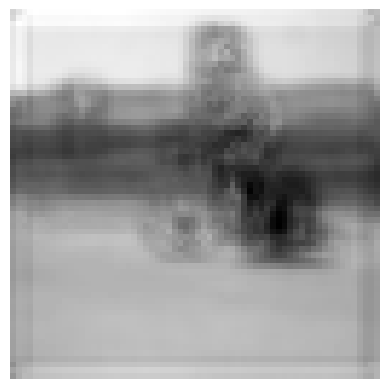

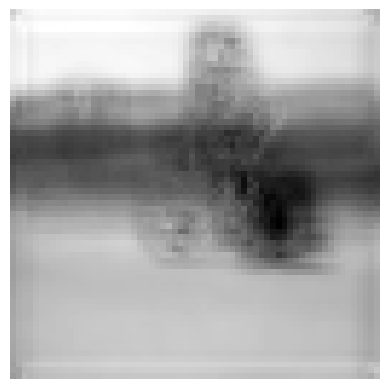

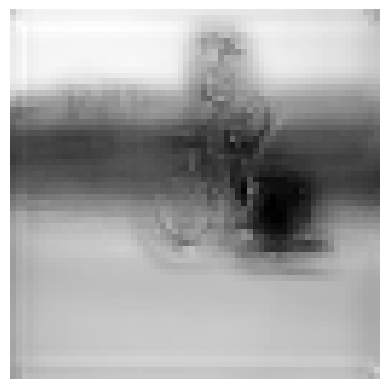

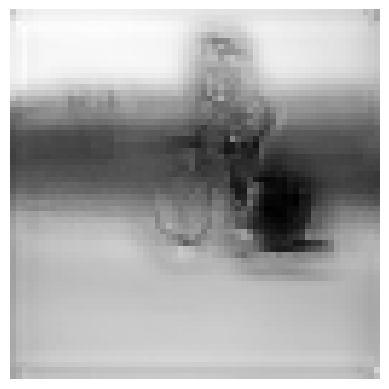

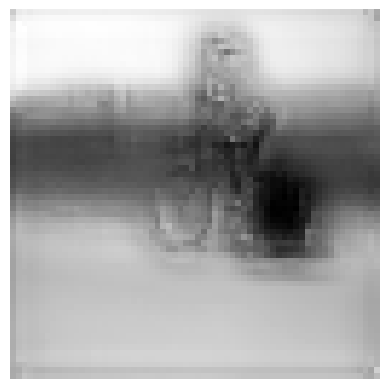

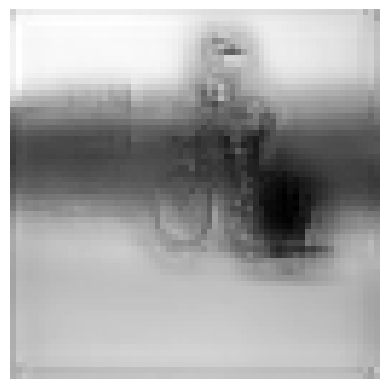

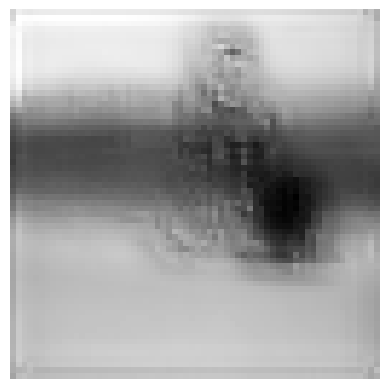

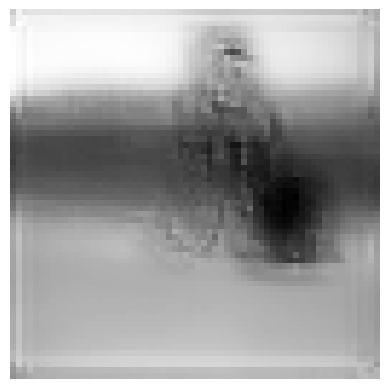

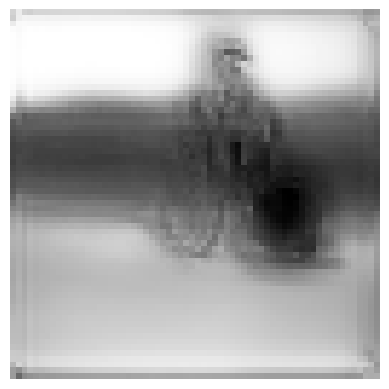

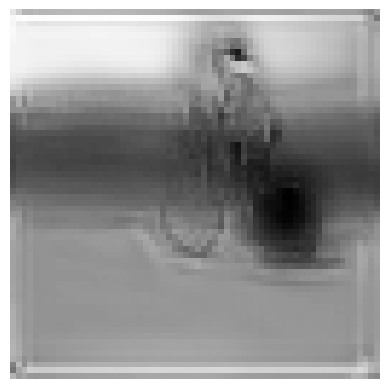

In [12]:
import cv2
import matplotlib.pyplot as plt

# Function to display frames from the model's predictions
def display_predicted_frames(predicted_frames):
    """
    Displays predicted frames one by one in the Jupyter notebook using Matplotlib.
    """
    # Loop through the predicted frames and display each one
    for frame in predicted_frames:
        plt.imshow(frame, cmap='gray')
        plt.axis('off')  # Hide axes
        plt.show()
        
        # Add a small delay to simulate frame rate (you can adjust this)
        cv2.waitKey(30)  # Delay in milliseconds (e.g., 30ms for ~33 FPS)
        
# Example of using the function after generating predictions
# Assuming `conv_lstm_model` is the trained model and `x_test_batch` is the input batch
predicted_frames = conv_lstm_model.predict(x_test_batch)

# If the model generates a sequence, remove the batch dimension
predicted_frames = np.squeeze(predicted_frames, axis=0)

# Display the predicted frames one by one
display_predicted_frames(predicted_frames)


In [ ]:
# Generate a batch of frames from the generator
frame_gen = data_generator('./frames_val/', batch_size=1)

# Get a batch of input frames (x_batch) and corresponding target frames (y_batch)
x_batch, y_batch = next(frame_gen)

# Make predictions using the ConvLSTM model
predicted_frames = conv_lstm_model.predict(x_batch)

# Display the predicted frames
predicted_frames = np.squeeze(predicted_frames, axis=0)  # Remove the batch dimension
display_predicted_frames(predicted_frames)


NameError: name 'data_generator' is not defined

: 

In [11]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_consecutive_frames_from_folder(folder_path, frame_size=(64, 64), num_frames=10):
    """
    Load and preprocess 10 consecutive frames from a folder.
    The frames should be sorted by filename to ensure continuity.
    """
    frame_paths = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpg')])
    
    # Ensure there are at least num_frames in the folder
    if len(frame_paths) < num_frames:
        raise ValueError(f"Not enough frames in the folder. Found {len(frame_paths)}, expected at least {num_frames}.")
    
    frames = []
    
    # Choose a random starting point for the 10 consecutive frames
    start_idx = np.random.randint(0, len(frame_paths) - num_frames + 1)
    
    # Load 10 consecutive frames
    for frame_path in frame_paths[start_idx:start_idx + num_frames]:
        frame = load_img(frame_path, target_size=frame_size, color_mode='grayscale')
        frame = img_to_array(frame) / 255.0  # Normalize the frame to [0, 1]
        frames.append(frame)

    return np.array(frames)

def generate_video_from_frames(frames, output_path, fps=15):
    """
    Generate a video from frames and save it to the specified path.
    """
    height, width, layers = frames[0].shape
    size = (width, height)
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'MP4V'), fps, size) # DIVX for avi MP4V for mp4

    for frame in frames:
        out.write(frame)

    out.release()

# Path to the folder containing frames (make sure there are more than 10 frames in it)
folder_path = './frames_val/Biking/v_Biking_g02_c05/'  # Change to the correct path

# Load 10 consecutive frames from the folder
x_test_batch = load_consecutive_frames_from_folder(folder_path)

# Reshape to match the input format expected by the model (batch size, time steps, height, width, channels)
x_test_batch = np.expand_dims(x_test_batch, axis=0)  # Add batch dimension

# Make predictions using the ConvLSTM model
predicted_frames = conv_lstm_model.predict(x_test_batch)

# Post-process the predicted frames (if needed)
predicted_frames = np.squeeze(predicted_frames, axis=0)  # Remove batch dimension

# Generate a video from the predicted frames
generate_video_from_frames(predicted_frames, 'predicted_video2.mp4')


1/1 [==============================] - 2s 2s/step


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import tensorflow as tf
from sklearn.metrics import accuracy_score

# Define the function to load and preprocess frames
def load_and_preprocess_frames(frame_save_path, class_name, frame_size=(64, 64), num_frames=10):
    """
    Loads frames for a given class and processes them to match the model input.
    """
    class_folder = os.path.join(frame_save_path, class_name)
    frame_paths = []
    
    # Iterate over video folders in class
    for video_folder in os.listdir(class_folder):
        video_folder_path = os.path.join(class_folder, video_folder)
        
        # Skip files if not directories
        if not os.path.isdir(video_folder_path):
            continue
        
        frames = []
        for frame_file in sorted(os.listdir(video_folder_path)):  # Sort frames to maintain sequence
            frame_path = os.path.join(video_folder_path, frame_file)
            if frame_path.endswith('.jpg'):  # Assuming frames are saved as .jpg
                frame = load_img(frame_path, target_size=frame_size, color_mode='grayscale')
                frame = img_to_array(frame) / 255.0  # Normalize the frame to [0, 1]
                frames.append(frame)

        # Ensure that the number of frames is correct
        if len(frames) >= num_frames:
            frames = frames[:num_frames]  # If more frames, crop to the first 10 (or as needed)
            frame_paths.append(np.array(frames))  # Append as a sequence of frames

    return np.array(frame_paths)

# Define a function to predict and evaluate the model
def evaluate_model(model, frame_save_path, classes, num_frames=10):
    """
    Evaluate the model on each class from the validation set.
    """
    all_true_labels = []
    all_predictions = []
    
    for class_name in classes:
        # Load frames for each class
        x_val = load_and_preprocess_frames(frame_save_path, class_name, num_frames=num_frames)
        true_labels = [class_name] * len(x_val)  # True labels for this class

        # Predict using the trained model
        predictions = model.predict(x_val)  # Predict on the batch
        
        # For multi-class classification, convert predictions to class labels
        predicted_labels = np.argmax(predictions, axis=-1)  # Assuming softmax output

        all_true_labels.extend(true_labels)
        all_predictions.extend(predicted_labels)
    
    # Calculate accuracy
    accuracy = accuracy_score(all_true_labels, all_predictions)
    print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Example: Assuming your model is saved in 'model.h5'
# model = load_model('model.h5')

# Classes you're testing
classes = ['Biking', 'SoccerPenalty', 'JumpingJack', 'BasketballDunk', 'VolleyballSpiking']

# Call the evaluate function
evaluate_model(conv_lstm_model, './frames_val/', classes, num_frames=10)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


ValueError: Classification metrics can't handle a mix of multiclass and unknown targets